In [1]:
import pyPhyNR as pynr

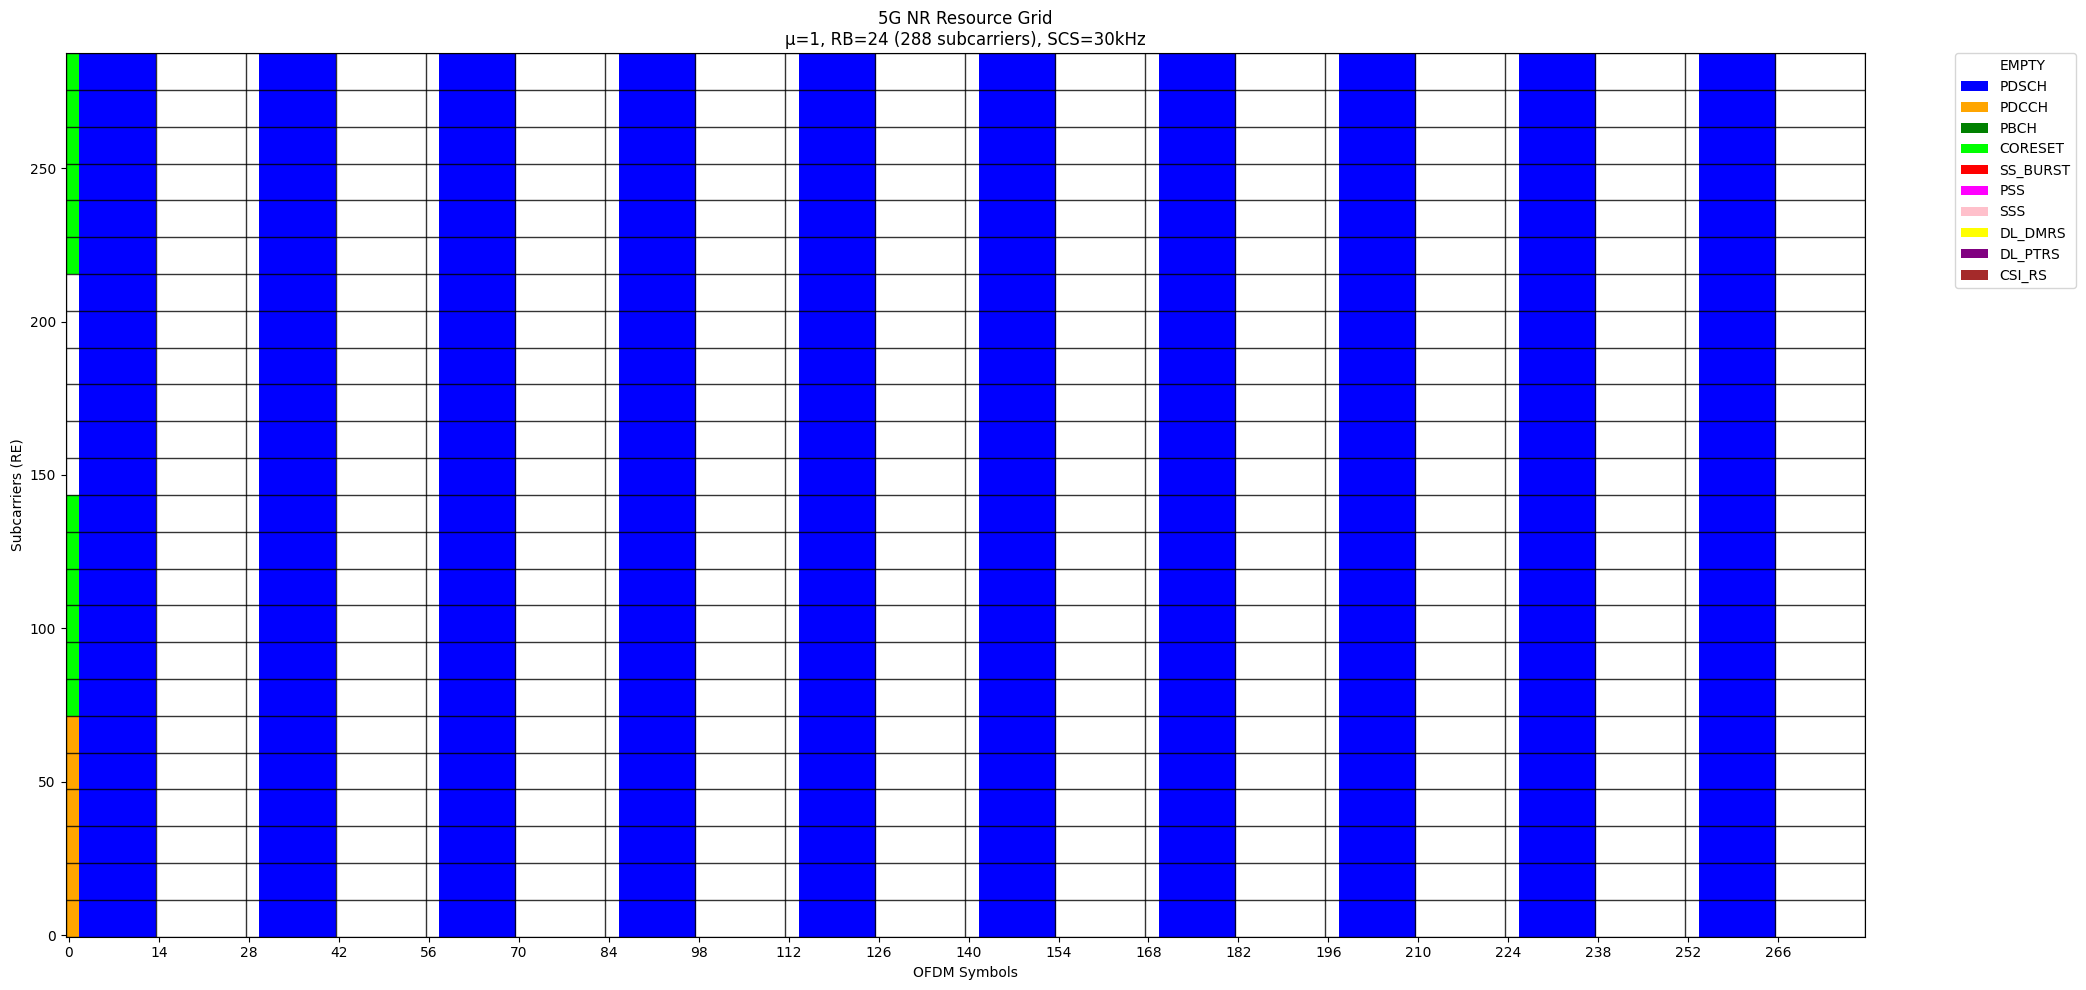

In [2]:
carrier_config = pynr.core.CarrierConfig.from_bandwidth(10, 1)
grid = carrier_config.get_resource_grid()

pdsch = pynr.core.channels.PDSCH(start_rb=0, num_rb=24, start_symbol=2, num_symbols=12, slot_pattern=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18], modulation=pynr.core.ModulationType.QAM64)
grid.add_channel(pdsch)
coreset = pynr.core.channels.CORESET(
    start_rb=0,
    num_rb=24,  # 4 RBGs
    start_symbol=0,
    num_symbols=2,
    slot_pattern=[0],
    rbg_bitmap=[1, 1, 0, 1]  # First 12 RBs and last 6 RBs active
)
pdcch = pynr.core.channels.PDCCH(
    start_rb=0,  # Must align with active CORESET RBs
    num_rb=6,    # Must fit within active CORESET RBs
    start_symbol=0,
    num_symbols=2,
    slot_pattern=[0]
)
grid.add_channel(coreset)
grid.add_channel(pdcch)
pynr.utils.plot_grid_dl(carrier_config, grid)

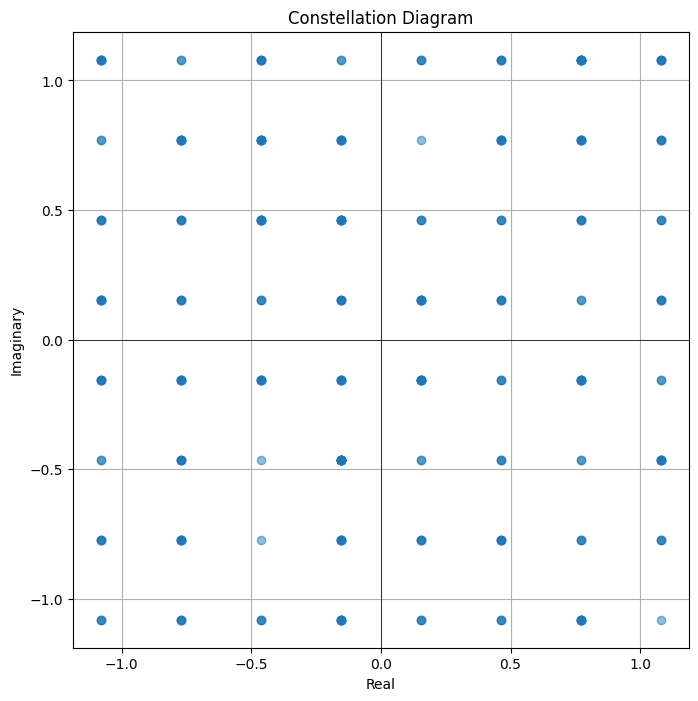

In [3]:
pynr.utils.plot_constellation(
    grid.values[:, 2],
)

In [12]:
carrier_config.set_sample_rate(11.52e6)
waveform_gen = pynr.core.WaveformGenerator()
iq_samples = waveform_gen.generate_frame_waveform(grid, carrier_config)
len(iq_samples)

115200

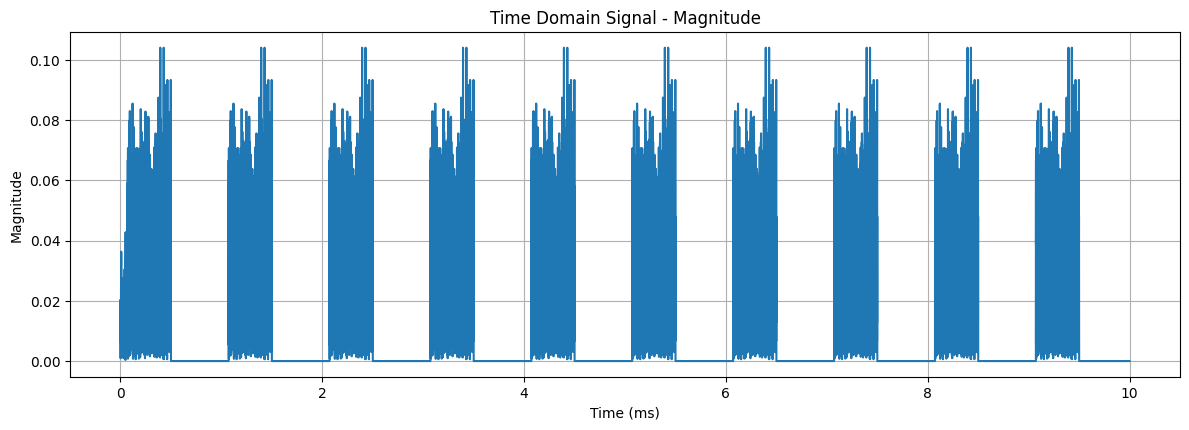

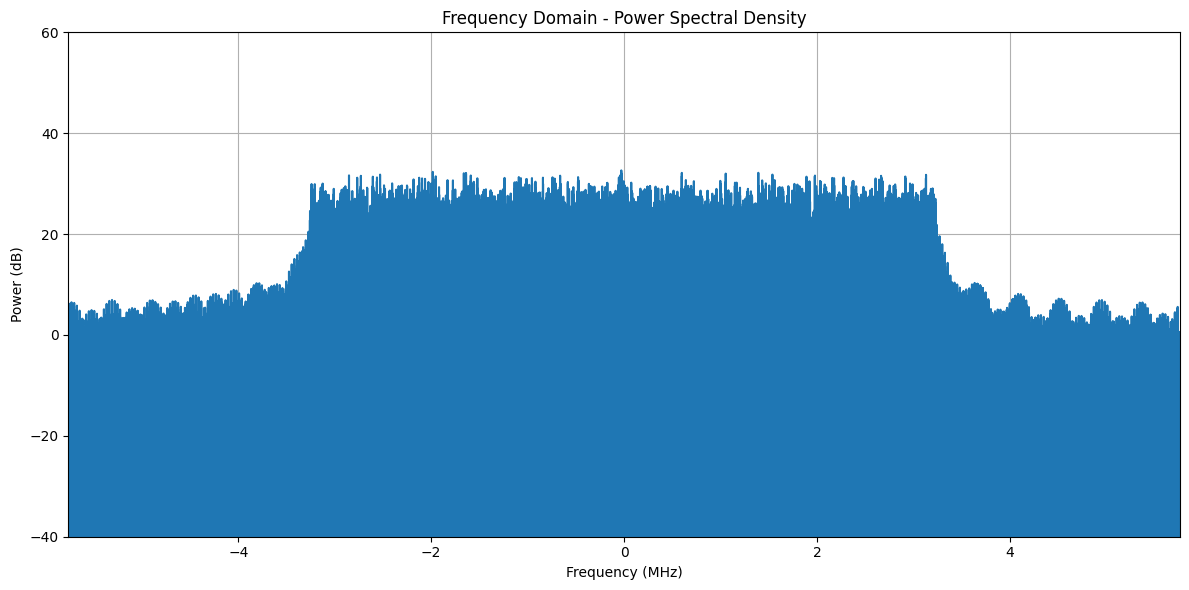

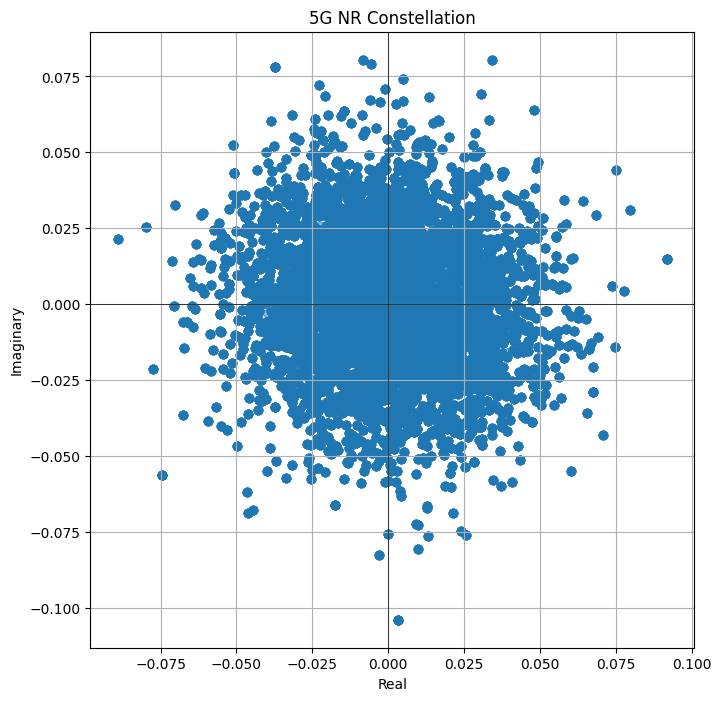

In [13]:
pynr.utils.plot_time_domain(iq_samples, carrier_config)
pynr.utils.plot_frequency_domain(iq_samples, carrier_config)
pynr.utils.plot_constellation(iq_samples, title="5G NR Constellation")
